In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
lb=preprocessing.LabelEncoder()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [3]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [5]:
x_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [6]:
x_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [7]:
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [8]:
print('x_train and y_train : ({},{})'.format(x_train.shape, y_train.shape))
print('x_test  and y_test  : ({},{})'.format(x_test.shape, y_test.shape))

x_train and y_train : ((7352, 561),(7352,))
x_test  and y_test  : ((2947, 561),(2947,))


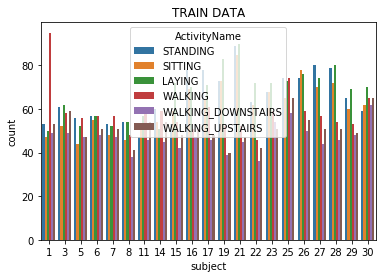

In [9]:
sns.countplot(x="subject", hue="ActivityName", data=train)
plt.title("TRAIN DATA")
plt.show()

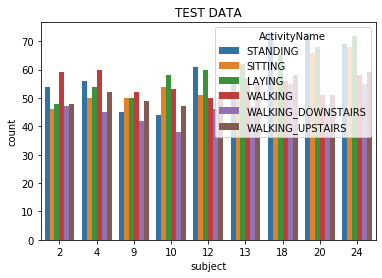

In [10]:
sns.countplot(x="subject", hue="ActivityName", data=test)
plt.title("TEST DATA")
plt.show()

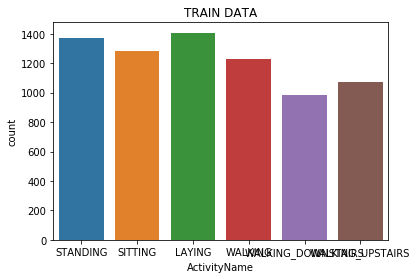

In [11]:
sns.countplot(x='ActivityName',data=train)
plt.title("TRAIN DATA")
plt.show()

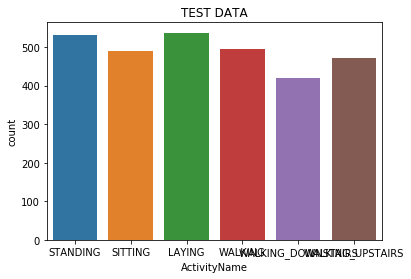

In [12]:
sns.countplot(x='ActivityName',data=test)
plt.title("TEST DATA")
plt.show()

In [ ]:
knn = KNeighborsClassifier(42,weights='distance',leaf_size=30,n_jobs=-2,p = 1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred.shape)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
x = mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
y = mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print(x,y)


In [15]:
accu = []
rms = []
mae = []
subjects=test['subject'].values
for i in range(1,32):
    knn = KNeighborsClassifier(i,weights='distance',leaf_size=30,n_jobs=-2,p = 1,metric_params=None)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    #print(y_pred.shape)
    # Model Accuracy, how often is the classifier correct?
    print("k Accuracy:",i,metrics.accuracy_score(y_test, y_pred))
    print(i)
    x = mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
    y = mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
    mae.append(y)
    rms.append(x)
    accu.append(metrics.accuracy_score(y_test, y_pred))

k Accuracy: 1 0.8887003732609433
1
k Accuracy: 2 0.8887003732609433
2
k Accuracy: 3 0.9049881235154394
3
k Accuracy: 4 0.9060061079063454
4
k Accuracy: 5 0.9134713267729895
5
k Accuracy: 6 0.9134713267729895
6
k Accuracy: 7 0.9127926705123854
7
k Accuracy: 8 0.9155072955548015
8
k Accuracy: 9 0.9168646080760094
9
k Accuracy: 10 0.9175432643366135
10
k Accuracy: 11 0.9212758737699356
11
k Accuracy: 12 0.9199185612487275
12
k Accuracy: 13 0.9195792331184255
13
k Accuracy: 14 0.9172039362063115
14
k Accuracy: 15 0.9178825924669155
15
k Accuracy: 16 0.9189005768578216
16
k Accuracy: 17 0.9202578893790295
17
k Accuracy: 18 0.9229725144214456
18
k Accuracy: 19 0.9212758737699356
19
k Accuracy: 20 0.9222938581608415
20
k Accuracy: 21 0.9219545300305395
21
k Accuracy: 22 0.9219545300305395
22
k Accuracy: 23 0.9216152019002375
23
k Accuracy: 24 0.9219545300305395
24
k Accuracy: 25 0.9195792331184255
25
k Accuracy: 26 0.9216152019002375
26
k Accuracy: 27 0.9199185612487275
27
k Accuracy: 28 0.92

In [16]:
a = accu
b = [i for i in range(1,32)]
print(a,b)

[0.8887003732609433, 0.8887003732609433, 0.9049881235154394, 0.9060061079063454, 0.9134713267729895, 0.9134713267729895, 0.9127926705123854, 0.9155072955548015, 0.9168646080760094, 0.9175432643366135, 0.9212758737699356, 0.9199185612487275, 0.9195792331184255, 0.9172039362063115, 0.9178825924669155, 0.9189005768578216, 0.9202578893790295, 0.9229725144214456, 0.9212758737699356, 0.9222938581608415, 0.9219545300305395, 0.9219545300305395, 0.9216152019002375, 0.9219545300305395, 0.9195792331184255, 0.9216152019002375, 0.9199185612487275, 0.9202578893790295, 0.9178825924669155, 0.9182219205972175, 0.9165252799457075] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


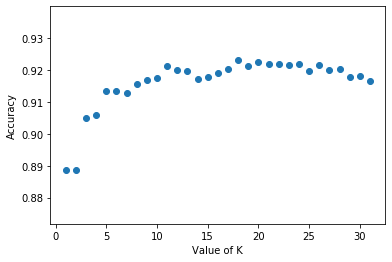

In [17]:
plt.scatter(b,a)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

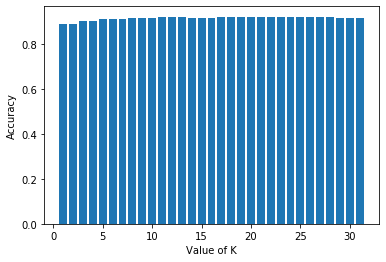

In [18]:
plt.bar(b,a)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

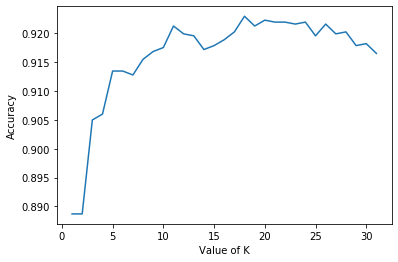

In [19]:
plt.plot(b,a)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

In [20]:
mean_squared_error(y_test, y_pred, sample_weight=None)

0.12724804886325075

In [21]:
print(rms)

[0.167288768238887, 0.167288768238887, 0.14489311163895488, 0.14489311163895488, 0.13539192399049882, 0.13437393959959282, 0.1340346114692908, 0.1333559552086868, 0.1350525958601968, 0.13640990838140482, 0.1326772989480828, 0.1319986426874788, 0.1333559552086868, 0.1367492365117068, 0.1350525958601968, 0.1309806582965728, 0.13064133016627077, 0.12385476756023074, 0.12758737699355277, 0.12453342382083475, 0.12589073634204276, 0.12283678316932474, 0.12317611129962674, 0.12080081438751272, 0.12623006447234475, 0.12012215812690873, 0.12487275195113674, 0.12249745503902273, 0.12690872073294876, 0.12555140821174077, 0.12724804886325075]


In [22]:
print(mae)

[0.12928401764506278, 0.12928401764506278, 0.11096029860875467, 0.11028164234815066, 0.1021377672209026, 0.10179843909060061, 0.1021377672209026, 0.1001017984390906, 0.0990838140481846, 0.0990838140481846, 0.09535120461486257, 0.09602986087546658, 0.09670851713607058, 0.09942314217848659, 0.09840515778758059, 0.09636918900576857, 0.09535120461486257, 0.09127926705123855, 0.09365456396335256, 0.09195792331184255, 0.09263657957244656, 0.09161859518154054, 0.09195792331184255, 0.09093993892093655, 0.09433322022395657, 0.09093993892093655, 0.09365456396335256, 0.09263657957244656, 0.09569053274516458, 0.09501187648456057, 0.09670851713607058]


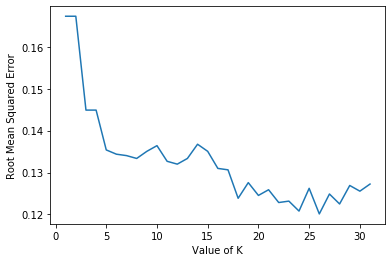

In [23]:
plt.plot(b,rms)
plt.xlabel("Value of K")
plt.ylabel("Root Mean Squared Error")
plt.show()

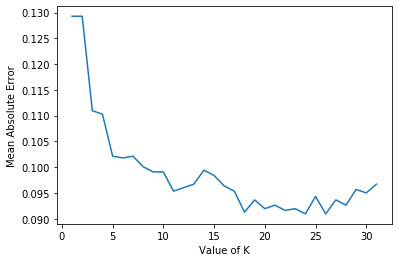

In [24]:
plt.plot(b,mae)
plt.xlabel("Value of K")
plt.ylabel("Mean Absolute Error")
plt.show()